## Landing Club Case Study

In [157]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(rc={'figure.figsize':(8,6)})

1.24.3
0.12.2


In [84]:
loan_df = pd.read_csv(r'C:\Users\Manoj Kumar Panicker\python Again\Files\loan.csv')

In [85]:
loan_df.info() # checked the csv file and find out there are columns having only null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [86]:
# Checking if there are columns with only null values...
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [87]:
# Dropping all columns where all values are null
loan_df = loan_df.dropna(axis=1, how='all') 

In [88]:
# Dropping all rows where all values are null -- No such rows found
loan_df = loan_df.dropna(axis=0, how='all') 

In [89]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [90]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [91]:
# dropping columns where most of records are null
loan_df=loan_df.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1) 

In [92]:
# getting column list where there is only 1 unique value
loan_df.columns[loan_df.nunique()==1] 

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [93]:
# dropping columns list where there is only 1 unique value
loan_df=loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

In [94]:
# Dropping columns with unusefull information
# zip_code is encrypted, URL is same except last value which is in member id,  desc has manual entered values with no consistency
#loan_df=loan_df.drop(['zip_code'], axis=1) 
loan_df=loan_df.drop(['url', 'desc','emp_title','title'], axis=1) 

In [95]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [96]:
#Creating proper date format
loan_df['issue_d'] = pd.to_datetime('1-'+loan_df['issue_d'])

In [97]:
# Creating Year field for year wise analysis
loan_df['Year'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [98]:
# Creating Month field for Month wise analysis
loan_df['Month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [99]:
# Combining verified values in one value to club them in one bar
Verified = {'Not Verified':'No','Source Verified':'Yes','Verified':'Yes'}
loan_df['Verified']= loan_df['verification_status'].map(Verified)

In [100]:
# as there are values like 10+ and we can not cosider these values as 10 hence using mode.
emp_lenth=(loan_df['emp_length'].mode())[0] # with mode output is 10 + year 

In [101]:
# Replacing null with mode of column
loan_df['emp_length'].fillna(value=emp_lenth,inplace=True)

In [102]:
# checking if NA values has been replaced
loan_df['emp_length'].isnull().sum()

0

In [103]:
# getting numeric value from emp_length and the median of it.... 
loan_df['emp_length_num'] =(loan_df['emp_length'].str.extract('(\d+)')).astype(float).astype(int)

In [104]:
loan_df['emp_length_num'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [105]:
# Converting int_rate and revol_util to float
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','').astype(float)
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','').astype(float)

In [106]:
#Analyse [loan_status,delinq_2yrs,mths_since_last_delinq,pub_rec,last_pymnt_d,pub_rec_bankruptcies]
loan_df['revol_util'].median()

49.3

In [107]:
# Checking Null Record % column wise
round(loan_df.isnull().sum()/loan_df.shape[0]*100,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
out_prncp                   0.00
out_prncp_

In [108]:
# Filling Null values in revol_util
loan_df['revol_util'].fillna(value=loan_df['revol_util'].median(),inplace=True)


In [109]:
# Creating monthly Income columns
loan_df['monthly_inc'] = round(loan_df['annual_inc']/12,2)

In [110]:
# Getting percentage of EMI on monthly income
loan_df['EMI%_on_Income'] = round((loan_df['installment']/loan_df['monthly_inc'])*100,2)

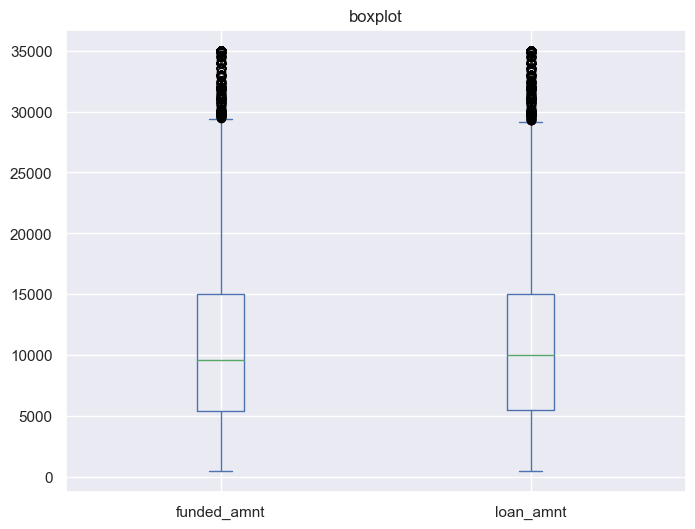

In [111]:
# Checking if there are outliers in amount columns
loan_df[['funded_amnt','loan_amnt']].plot(kind='box', title='boxplot')
plt.show()

# using 1st Standard Deviation to remove outliers from funded_amnt

In [112]:
mean = loan_df['funded_amnt'].mean()
std_dev = np.std(loan_df['funded_amnt'],axis=0)
_1st_std_low =  mean - (std_dev)
_1st_std_high = mean + (std_dev)

loan_df_remv_otlr = loan_df[(loan_df['funded_amnt'] > _1st_std_low)& (loan_df['funded_amnt'] < _1st_std_high)]
loan_df_remv_otlr.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Year,Month,Verified,emp_length_num,monthly_inc,EMI%_on_Income
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,2011,12,Yes,10,2000.0,8.14
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,2011,12,Yes,10,4100.0,8.28


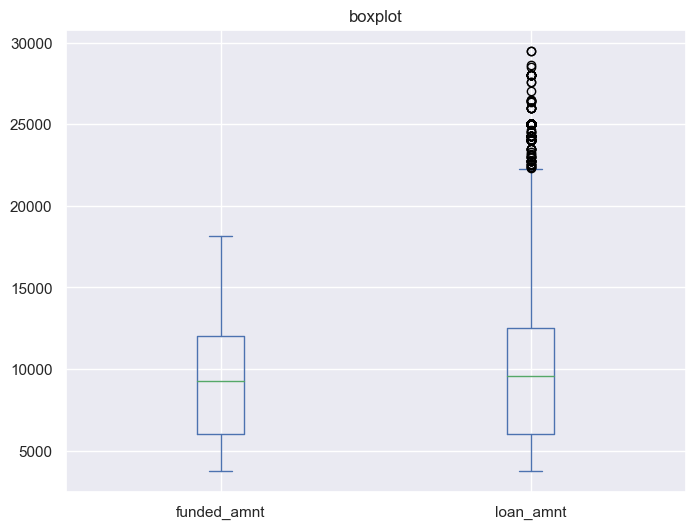

In [113]:
# Checking after removing outliers from funded_amnt
loan_df_remv_otlr[['funded_amnt','loan_amnt']].plot(kind='box', title='boxplot')
plt.show()

In [114]:
# using 95 percentile to remove outliers in funded_amnt was also giving almost same result hence commenting below code
# max_val = np.percentile(loan_df_remv_otlr.funded_amnt,95)

#loan_df_remv_otlr = loan_df[(loan_df['funded_amnt'] < max_val)]
#loan_df_remv_otlr.head(2)

<Axes: xlabel='term'>

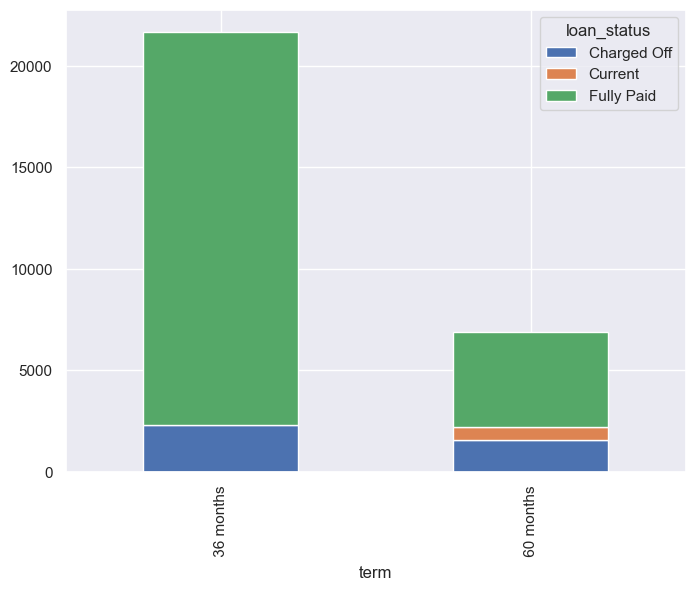

In [115]:
# Creating stack bar chart on term and loan status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['term','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# Above chart shows that percentage of 'Charged Off'  is much higer where term is 60 Months. 

In [116]:
# for detail analysis creating below table
temp_df = loan_df_remv_otlr.groupby(['term','loan_status']).size().unstack()
temp_df = temp_df.merge(loan_df_remv_otlr.groupby('term').agg({'id':'count'}),on='term',how='left')
temp_df.div(temp_df['id'],axis=0)

,Charged Off,Current,Fully Paid,id
term,,,,
36 months,0.106255,NaN,0.893745,1.0
60 months,0.222690,0.094734,0.682577,1.0


# Above table also shows the same analysis that 'Charged Off' is much higer where term is 60 Months.

<Axes: xlabel='emp_length_num'>

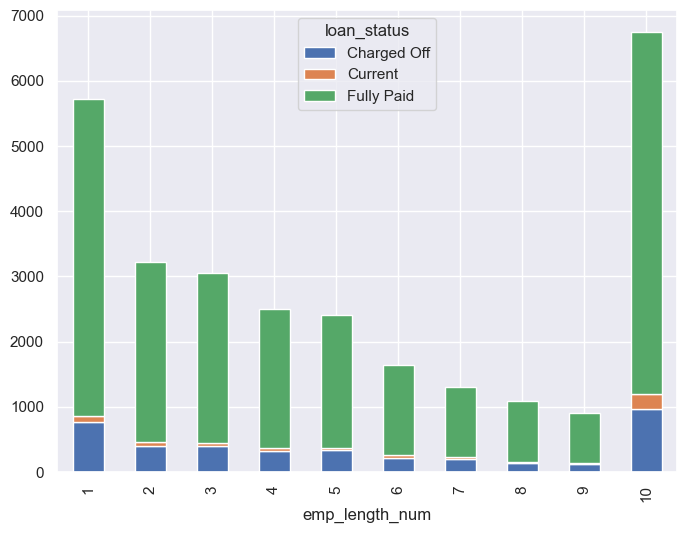

In [117]:
# Creating stack bar chart on emp_length_num and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['emp_length_num','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# Above chart shows that charged off cases are much higher where employment length is 1,<1  or 10 years or 10+ years

In [118]:
# for detail analysis creating below table
temp_df = loan_df_remv_otlr.groupby(['emp_length_num','loan_status']).size().unstack()
temp_df = temp_df.merge(loan_df_remv_otlr.groupby('emp_length_num').agg({'id':'count'}),on='emp_length_num',how='left')
temp_df.div(temp_df['id'],axis=0).sort_values(by='Charged Off',ascending=False).head()

,Charged Off,Current,Fully Paid,id
emp_length_num,,,,
7,0.148773,0.028374,0.822853,1.0
10,0.143429,0.033931,0.822640,1.0
5,0.137328,0.016230,0.846442,1.0
1,0.133893,0.016780,0.849327,1.0
6,0.132603,0.023114,0.844282,1.0


# above table clearly shows that emp_length of 7,10 have higer percentage of chargedoff cases

<Axes: xlabel='purpose'>

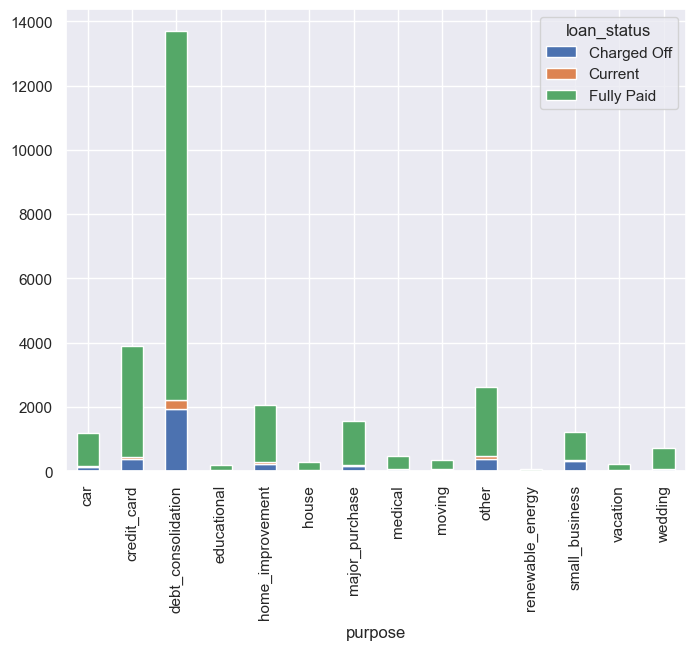

In [119]:
# Creating stack bar chart on purpose and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['purpose','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# debt_consolidation has higher charge_off cases as compare to other purposes

In [120]:
# for detail analysis creating below table
temp_df = loan_df_remv_otlr.groupby(['purpose','loan_status']).size().unstack()
temp_df = temp_df.merge(loan_df_remv_otlr.groupby('purpose').agg({'id':'count'}),on='purpose',how='left')
temp_df.div(temp_df['id'],axis=0).sort_values(by='Charged Off',ascending=False).head()

,Charged Off,Current,Fully Paid,id
purpose,,,,
small_business,0.252260,0.034511,0.713229,1.0
educational,0.179612,NaN,0.820388,1.0
renewable_energy,0.158730,NaN,0.841270,1.0
moving,0.150000,0.014706,0.835294,1.0
medical,0.149897,0.020534,0.829569,1.0


# by combining Above chart and table shows that small_business has higer percentage of chargedoff case

<Axes: xlabel='verification_status'>

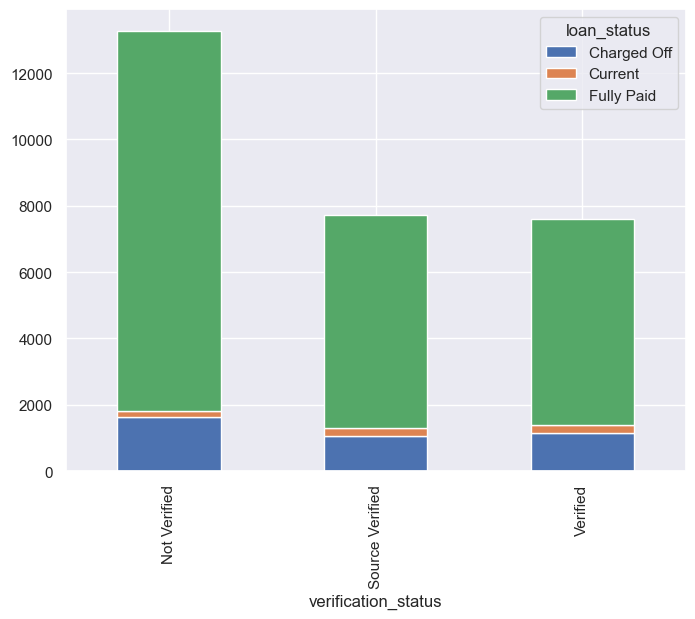

In [121]:
# Creating stack bar chart on verification_status and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['verification_status','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# above graph shows that total count and chargeoff count of 'Not Verified' is higher, however if we see by percentage 'Verified' has much higher lets see below clubbed graph for the same

<Axes: xlabel='Verified'>

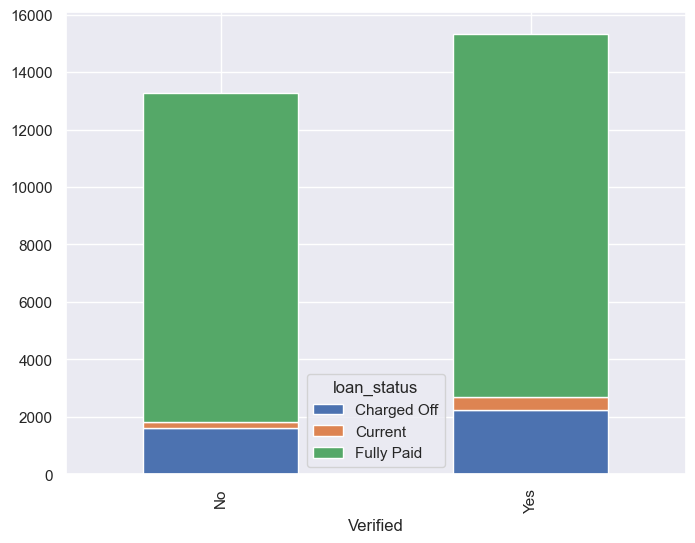

In [122]:
# Creating stack bar chart on Verified and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['Verified','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# After combining verified values we can see that verified cases have higher percentage of chargedoff cases, hence we can draw the conclusion that verification department need to improve its practices

<Axes: xlabel='home_ownership'>

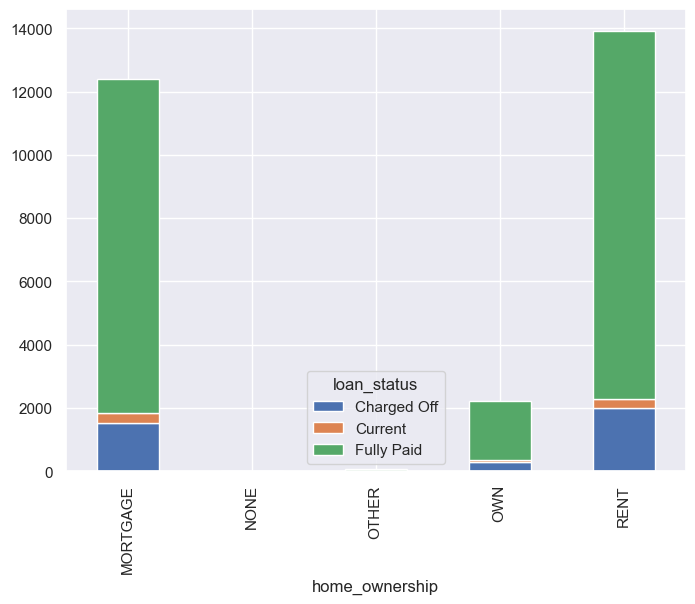

In [123]:
# Creating stack bar chart on home_ownership and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['home_ownership','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# Most of the cases are belongs to Rent and Mortgage and'Charged off' cases also higer respectively, not able to get important analysis from this

In [124]:
# for detail analysis creating below table
temp_df = loan_df_remv_otlr.groupby(['home_ownership','loan_status']).size().unstack()
temp_df = temp_df.merge(loan_df_remv_otlr.groupby('home_ownership').agg({'id':'count'}),on='home_ownership',how='left')
temp_df.div(temp_df['id'],axis=0)

,Charged Off,Current,Fully Paid,id
home_ownership,,,,
MORTGAGE,0.122881,0.026966,0.850153,1.0
NONE,NaN,NaN,1.000000,1.0
OTHER,0.177215,NaN,0.822785,1.0
OWN,0.135233,0.023519,0.841248,1.0
RENT,0.144162,0.019198,0.836641,1.0


# by looking on above chart and table we can say that OTHER has low total value hence RENT has higest number of chargeoff cases

In [125]:
# Creating bucket of annual_inc column
bins = np.array([5500,20500,50500,95500,110500,125500,140500])
loan_df_remv_otlr['Income_Bucket'] =pd.cut(loan_df_remv_otlr['annual_inc'], bins)

<Axes: xlabel='Income_Bucket'>

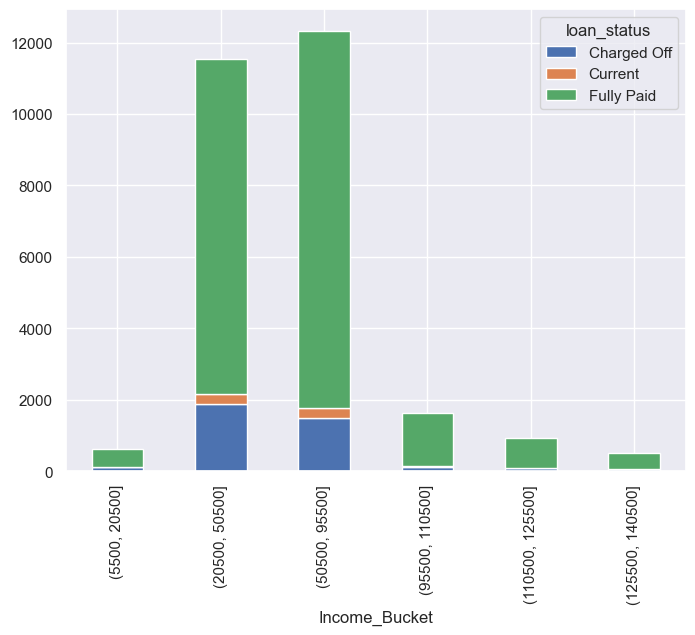

In [126]:
# Creating stack bar chart on Income_Bucket and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['Income_Bucket','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# above graph shows that income bucket of 20500-50500 has more cases of Charged Off cases. 

In [127]:
# Creating bins for int_rate for analysis
bins = np.array([0,10,15,20,25])
loan_df_remv_otlr['int_rate_bucket'] =pd.cut(loan_df_remv_otlr['int_rate'], bins)

<Axes: xlabel='int_rate_bucket'>

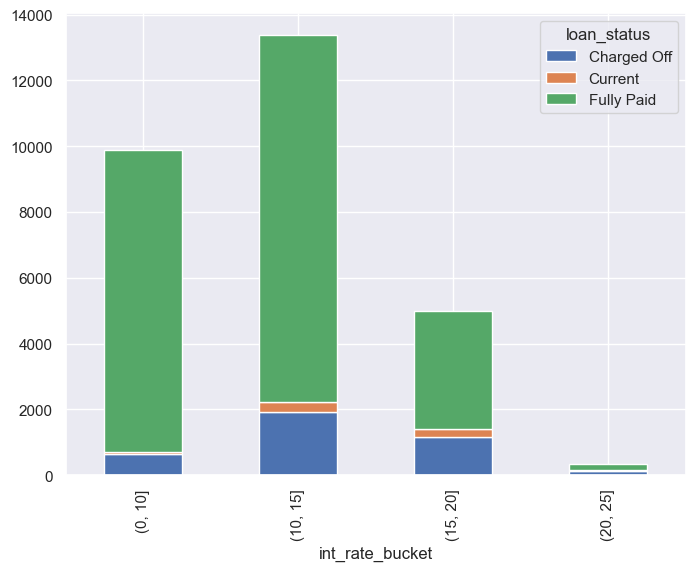

In [128]:
# Creating stack bar chart on int_rate_bucket and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['int_rate_bucket','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# Above chart shows that 15-20 range of bucket has higer Chargedoff cases and 0-10 has lowest chargeoff cases.

In [129]:
# For detail analyis created below tables
temp_df = loan_df_remv_otlr.groupby(['int_rate_bucket','loan_status']).size().unstack()
temp_df = temp_df.merge( loan_df_remv_otlr.groupby(['int_rate_bucket']).agg({'id':'count'}),on='int_rate_bucket',how='left')
temp_df.div(temp_df['id'],axis=0)

,Charged Off,Current,Fully Paid,id
int_rate_bucket,,,,
"(0, 10]",0.063912,0.006685,0.929403,1.0
"(10, 15]",0.143819,0.022362,0.833819,1.0
"(15, 20]",0.232461,0.050170,0.717370,1.0
"(20, 25]",0.362832,0.109145,0.528024,1.0


# from above chart and table it is clear that chances of chargeoff are higer if interest rate is between 15-20, as 20-25 has low total count

<Axes: xlabel='Year'>

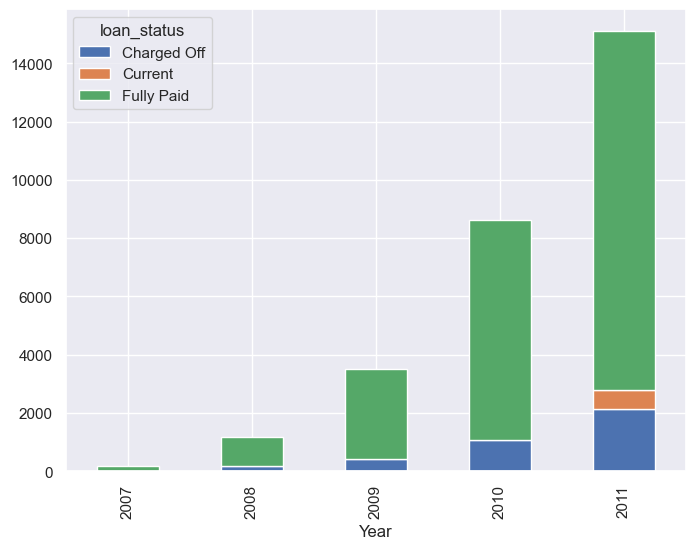

In [130]:
# Creating stack bar chart on Year and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['Year','loan_status']).size().unstack().plot(kind='bar', stacked=True)

In [131]:
# For detail analysis creating below table
temp_df =loan_df_remv_otlr.groupby(['Year','loan_status']).size().unstack()
temp_df=temp_df.merge(loan_df_remv_otlr.groupby(['Year']).agg({'id':'count'}),on='Year',how='right')
temp_df.div(temp_df['id'],axis=0)

,Charged Off,Current,Fully Paid,id
Year,,,,
2007,0.133721,NaN,0.866279,1.0
2008,0.156277,NaN,0.843723,1.0
2009,0.121903,NaN,0.878097,1.0
2010,0.124275,NaN,0.875725,1.0
2011,0.141268,0.043228,0.815504,1.0


# Above analysis shows that from 2010 to 2011, charged off percentage has increased from 12 to 14 

<Axes: xlabel='Month'>

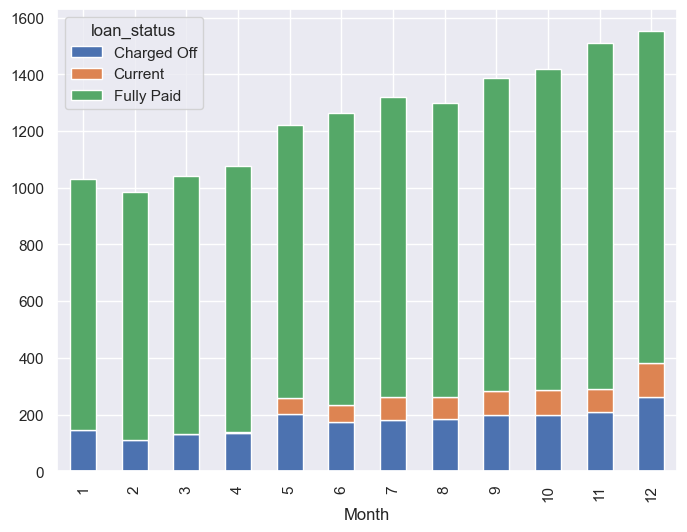

In [132]:
# 2011 monthly analysis on loan_status column
loan_df_remv_otlr.query("Year == 2011").groupby(["Month","loan_status"]).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Month'>

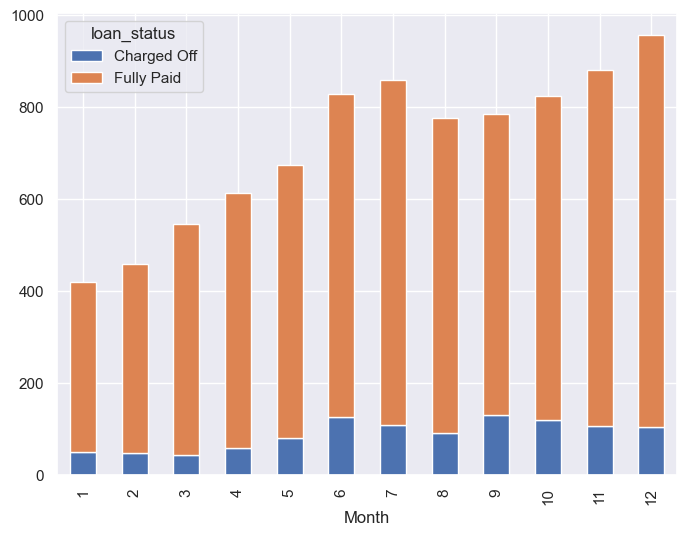

In [133]:
# 2010 monthly analysis on loan_status column
loan_df_remv_otlr.query("Year == 2010").groupby(["Month","loan_status"]).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Month'>

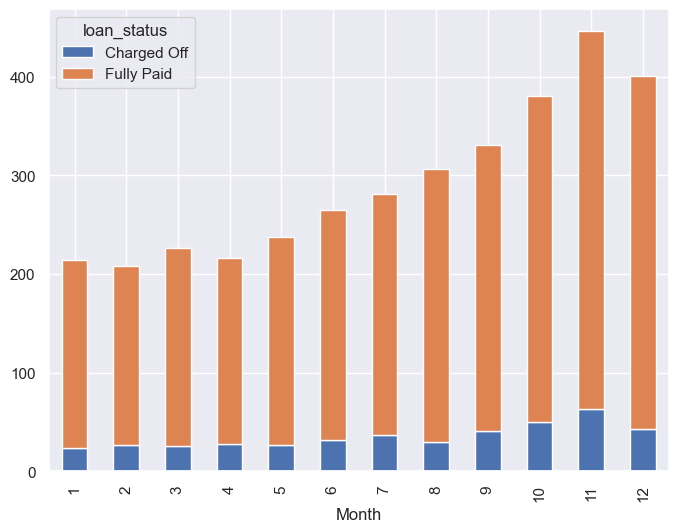

In [134]:
# 2009 monthly analysis on loan_status column
loan_df_remv_otlr.query("Year == 2009").groupby(["Month","loan_status"]).size().unstack().plot(kind='bar', stacked=True)

# Above 3 graph shows that from 5th month charge_off cases starts to increase and it is higer at 9th, 10th, 11th and 12th month

<Axes: xlabel='grade'>

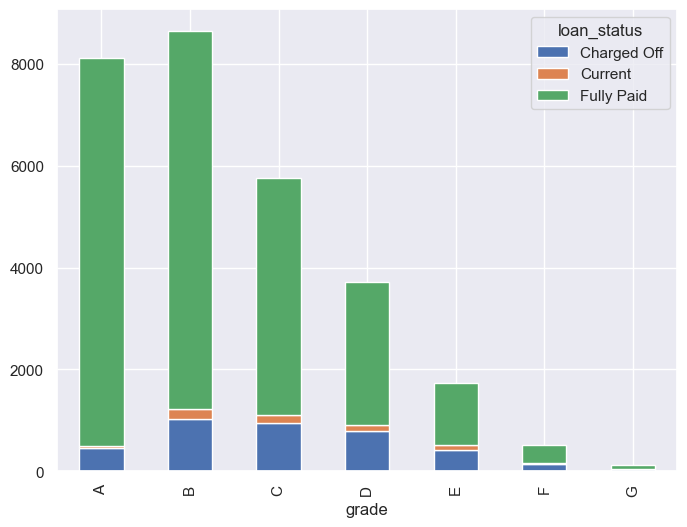

In [135]:
# Creating stack bar chart on grade and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['grade','loan_status']).size().unstack().plot(kind='bar', stacked=True)

# above bar chart shows that A has higest value count but lowest chargedoff cases. Hence grade A seems safer to provide loan

In [136]:
# For detail analysis creating below table 
temp_df =loan_df_remv_otlr.groupby(['grade','loan_status']).size().unstack()
temp_df=temp_df.merge(loan_df_remv_otlr.groupby(['grade']).agg({'id':'count'}),on='grade',how='right')
temp_df.div(temp_df['id'],axis=0).sort_values(by='Charged Off',ascending=False)

,Charged Off,Current,Fully Paid,id
grade,,,,
G,0.401709,0.059829,0.538462,1.0
F,0.284600,0.050682,0.664717,1.0
E,0.246528,0.054398,0.699074,1.0
D,0.210753,0.036290,0.752957,1.0
C,0.166377,0.027440,0.806183,1.0
B,0.117994,0.022696,0.859310,1.0
A,0.056692,0.004560,0.938748,1.0


# However by looking at above table we can say that grade g has higest percentage of chargedoff cases. E and F also has higher percentage of chargedoff cases.

<Axes: xlabel='sub_grade'>

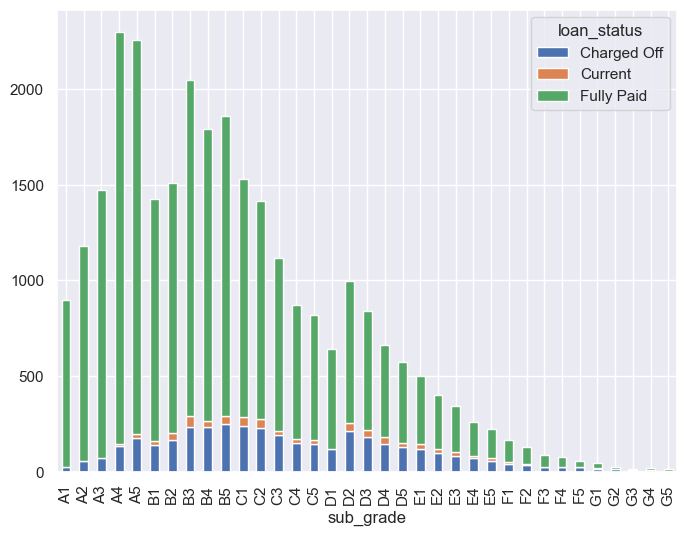

In [137]:
# Creating stack bar chart on grade and loan_status to show bifurcation of count of cases
loan_df_remv_otlr.groupby(['sub_grade','loan_status']).size().unstack().plot(kind='bar', stacked=True)

In [138]:
# In Subgrade there are too many values hence no graph, we can use top 5 table for this
temp_df =loan_df_remv_otlr.groupby(['sub_grade','loan_status']).size().unstack()
temp_df=temp_df.merge(loan_df_remv_otlr.groupby(['sub_grade']).agg({'id':'count'}),on='sub_grade',how='right')
temp_df.div(temp_df['id'],axis=0).sort_values(by='Charged Off',ascending = False).head(10)

,Charged Off,Current,Fully Paid,id
sub_grade,,,,
G2,0.461538,NaN,0.538462,1.0
F5,0.454545,0.018182,0.527273,1.0
G4,0.444444,0.055556,0.500000,1.0
G3,0.400000,0.066667,0.533333,1.0
G5,0.384615,NaN,0.615385,1.0
G1,0.355556,0.111111,0.533333,1.0
F4,0.282051,0.064103,0.653846,1.0
F2,0.275591,0.039370,0.685039,1.0
E4,0.268199,0.053640,0.678161,1.0


# Above 5 sub_grade have highest percentage of chargedoff cases

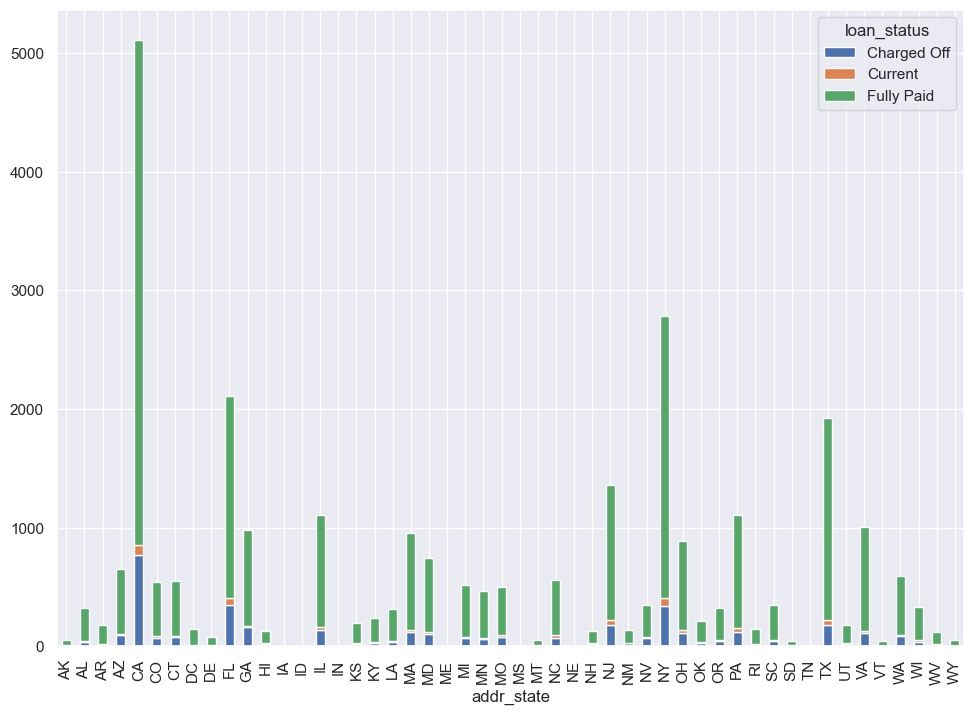

In [139]:
# Creating stack bar chart on addr_state and loan_status to show bifurcation of count of cases
sns.set_theme(rc={'figure.figsize':(11.7,8.27)}) # to increse chart area
loan_df_remv_otlr.groupby(['addr_state','loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

# above chart shows higer number of chargeoff cases in CA,FL,NY and TX

In [147]:
# for detail analysis creating below table
temp_df =loan_df_remv_otlr.groupby(['addr_state','loan_status']).size().unstack()
temp_df=temp_df.merge(loan_df_remv_otlr.groupby(['addr_state']).agg({'id':'count'}),on='addr_state',how='right')
temp_df.div(temp_df['id'],axis=0).sort_values(by='Charged Off',ascending=False).head(15)

,Charged Off,Current,Fully Paid,id
addr_state,,,,
NE,0.333333,NaN,0.666667,1.0
SD,0.219512,0.048780,0.731707,1.0
NV,0.201149,0.028736,0.770115,1.0
TN,0.181818,NaN,0.818182,1.0
NM,0.176471,0.014706,0.808824,1.0
FL,0.167142,0.024691,0.808167,1.0
HI,0.166667,0.047619,0.785714,1.0
GA,0.162743,0.016377,0.820880,1.0
MO,0.161677,0.021956,0.816367,1.0


# Above table has top 10 add_state with highest percentage of chargedoff cases

# below code is to Create numeric column for loan_status and term to check correlation with other numerical columns

In [141]:
# I have assigned charged off value higer than other two to make it work with correlation
# for example if interest rate is increasing and there is +ve correlation with this newly created numeric field that  
# means chances of charged off cases will also increase. 

loan_dual = {'Fully Paid':1,'Charged Off':2,'Current':1}
loan_df_remv_otlr['loan_status_num']= (loan_df_remv_otlr['loan_status'].map(loan_dual)).astype(int)

In [142]:
term_dual = {' 36 months':1,' 60 months':2}
loan_df_remv_otlr['term_num']= (loan_df_remv_otlr['term'].map(term_dual)).astype(int)

# Creating Correlation matrix for all facts available

In [143]:
round(loan_df_remv_otlr[['dti','funded_amnt','open_acc','pub_rec','total_rec_int','loan_status_num',
'int_rate','annual_inc','revol_bal','total_acc','revol_util','term_num','recoveries','collection_recovery_fee',
                        'last_pymnt_amnt','out_prncp','delinq_2yrs','emp_length_num']].corr(),2)

,dti,funded_amnt,open_acc,pub_rec,total_rec_int,loan_status_num,int_rate,annual_inc,revol_bal,total_acc,revol_util,term_num,recoveries,collection_recovery_fee,last_pymnt_amnt,out_prncp,delinq_2yrs,emp_length_num
dti,1.00,0.08,0.29,-0.00,0.12,0.04,0.11,-0.12,0.23,0.22,0.27,0.07,0.02,0.02,-0.00,0.04,-0.03,0.04
funded_amnt,0.08,1.00,0.12,-0.02,0.61,0.03,0.18,0.12,0.19,0.17,0.07,0.23,0.07,0.04,0.32,0.12,-0.03,0.09
open_acc,0.29,0.12,1.00,0.01,0.06,-0.01,-0.02,0.12,0.27,0.68,-0.11,0.02,-0.00,-0.00,0.05,0.01,0.02,0.08
pub_rec,-0.00,-0.02,0.01,1.00,0.03,0.06,0.12,-0.01,-0.05,-0.01,0.06,0.03,0.00,0.00,-0.02,-0.01,0.01,0.07
total_rec_int,0.12,0.61,0.06,0.03,1.00,-0.03,0.55,0.06,0.12,0.04,0.24,0.54,0.02,-0.00,0.01,0.33,0.04,0.06
loan_status_num,0.04,0.03,-0.01,0.06,-0.03,1.00,0.20,-0.05,0.00,-0.03,0.10,0.15,0.35,0.19,-0.24,-0.05,0.02,0.01
int_rate,0.11,0.18,-0.02,0.12,0.55,0.20,1.00,-0.01,0.03,-0.11,0.48,0.41,0.09,0.04,0.07,0.12,0.17,-0.05
annual_inc,-0.12,0.12,0.12,-0.01,0.06,-0.05,-0.01,1.00,0.22,0.19,0.01,0.00,-0.01,-0.00,0.06,0.00,0.02,0.08
revol_bal,0.23,0.19,0.27,-0.05,0.12,0.00,0.03,0.22,1.00,0.28,0.30,0.02,0.01,0.00,0.04,0.02,-0.05,0.13
total_acc,0.22,0.17,0.68,-0.01,0.04,-0.03,-0.11,0.19,0.28,1.00,-0.10,0.05,-0.00,0.00,0.13,0.00,0.08,0.19


# from above matrix we can draw the conclusion that if recoveries and chargeoff are positively correlated

# Also chargeoff is negatively correlated with column 'last_pymnt_amnt'.
# Also chargeoff is positively correlated with column 'int_rate'.